In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/folder"

In [ ]:
# Load dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=dataset_path, transform=train_transform)
labels = dataset.targets  # Dapatkan label dari dataset
unique_labels = set(labels)
print("Original Unique Labels:", unique_labels)

Original Unique Labels: {0, 1, 2}


In [ ]:
fixed_labels = [label % 3 for label in labels]

In [ ]:
fixed_unique_labels = set(fixed_labels)
print("Fixed Unique Labels:", fixed_unique_labels)

Fixed Unique Labels: {0, 1, 2}


In [ ]:
# pembagian datatrain dan datatesting
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Pelatihan
epochs = 10
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Perhitungan loss di dalam loop pelatihan
        loss.backward()
        optimizer.step()

    # Evaluasi model pada datatesting
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Epoch {epoch+1}/{epochs}, Akurasi: {accuracy:.4f}')

Epoch 1/10, Akurasi: 0.4800
Epoch 2/10, Akurasi: 0.6400
Epoch 3/10, Akurasi: 0.7400
Epoch 4/10, Akurasi: 0.7200
Epoch 5/10, Akurasi: 0.7100
Epoch 6/10, Akurasi: 0.5800
Epoch 7/10, Akurasi: 0.5700
Epoch 8/10, Akurasi: 0.7600
Epoch 9/10, Akurasi: 0.6100
Epoch 10/10, Akurasi: 0.6000


In [ ]:
# Tampilkan akurasi
final_accuracy = accuracy_score(all_labels, all_preds)
print(f'Akurasi setelah pelatihan: {final_accuracy:.4f}')

Akurasi setelah pelatihan: 0.6000


In [ ]:
# Evaluasi datatesting
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

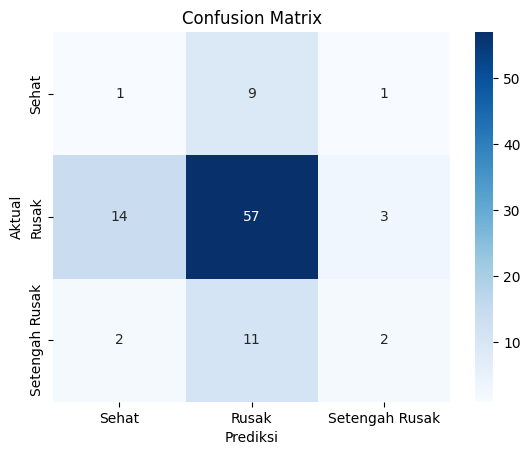

In [ ]:
# Menampilkan confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Rusak', 'Setengah Rusak'],
            yticklabels=['Sehat', 'Rusak', 'Setengah Rusak'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Membuat tabel
df = pd.DataFrame({'Aktual': all_labels, 'Prediksi': all_preds})
df['Aktual'] = df['Aktual'].map({0: 'Sehat', 1: 'Rusak', 2: 'Setengah Rusak'})
df['Prediksi'] = df['Prediksi'].map({0: 'Sehat', 1: 'Rusak', 2: 'Setengah Rusak'})

In [ ]:
# Menampilkan tabel
table = pd.crosstab(df['Aktual'], df['Prediksi'], rownames=['Aktual'], colnames=['Prediksi'])
print("Tabel Golongan Cabai:")
print(table)


Tabel Golongan Cabai:
Prediksi        Rusak  Sehat  Setengah Rusak
Aktual                                      
Rusak              57     14               3
Sehat               9      1               1
Setengah Rusak     11      2               2
